# General import functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scanpy as sc
from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
pwd

'/Users/angela.pisco/src/sapiens/tabula-sapiens/analysis-scripts'

# Load the data

In [3]:
tissue = 'Lung'

In [4]:
tiss_facs = read_h5ad('../../data-analysis/pilot/facs/tabula-sapiens-facs-pilot-filtered-Lung.h5ad')
tiss_droplet = read_h5ad('../../data-analysis/pilot/10X/tabula-sapiens-10X-pilot-filtered-lung.h5ad')
tiss_facs, tiss_droplet


(AnnData object with n_obs × n_vars = 730 × 24697 
     obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
     var: 'n_cells', AnnData object with n_obs × n_vars = 19684 × 21380 
     obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
     var: 'n_cells')

# Load the data

In [ ]:
adata

In [ ]:
set(adata.obs['tissue'])

Filter out cells with less than 200 genes detected and genes expressed in less than 3 cells

In [ ]:
adata

save the filtered data

In [ ]:
adata.write('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered.h5ad')

# Annotate the FACS data

In [5]:
adata = tiss_facs
adata

AnnData object with n_obs × n_vars = 730 × 24697 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [15]:
igg_genes = adata.var_names[adata.var_names.str.startswith('MT')]
igg_genes

Index(['MT1A', 'MT1B', 'MT1DP', 'MT1E', 'MT1F', 'MT1G', 'MT1H', 'MT1HL1',
       'MT1IP', 'MT1JP', 'MT1L', 'MT1M', 'MT1X', 'MT2A', 'MT3', 'MT4', 'MTA1',
       'MTA2', 'MTA3', 'MTAP', 'MTBP', 'MTCH1', 'MTCH2', 'MTCL1', 'MTCP1',
       'MTDH', 'MTERF1', 'MTERF2', 'MTERF3', 'MTERF4', 'MTF1', 'MTF2', 'MTFMT',
       'MTFP1', 'MTFR1', 'MTFR1L', 'MTFR2', 'MTG1', 'MTG2', 'MTHFD1',
       'MTHFD1L', 'MTHFD2', 'MTHFD2L', 'MTHFD2P1', 'MTHFR', 'MTHFS', 'MTHFSD',
       'MTIF2', 'MTIF3', 'MTL5', 'MTM1', 'MTMR1', 'MTMR10', 'MTMR11', 'MTMR12',
       'MTMR14', 'MTMR2', 'MTMR3', 'MTMR4', 'MTMR6', 'MTMR7', 'MTMR8', 'MTMR9',
       'MTMR9LP', 'MTNR1A', 'MTNR1B', 'MTO1', 'MTOR', 'MTOR-AS1', 'MTPAP',
       'MTR', 'MTRF1', 'MTRF1L', 'MTRNR2L1', 'MTRNR2L10', 'MTRNR2L2',
       'MTRNR2L3', 'MTRNR2L4', 'MTRNR2L5', 'MTRNR2L6', 'MTRNR2L7', 'MTRNR2L8',
       'MTRNR2L9', 'MTRR', 'MTSS1', 'MTSS1L', 'MTTP', 'MTURN', 'MTUS1',
       'MTUS2', 'MTUS2-AS1', 'MTVR2', 'MTX1', 'MTX2', 'MTX3'],
      dtype='object', na

In [6]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index(['ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012',
       'ERCC-00013', 'ERCC-00014', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024',
       'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034',
       'ERCC-00035', 'ERCC-00039', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044',
       'ERCC-00046', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00058',
       'ERCC-00059', 'ERCC-00060', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069',
       'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00076', 'ERCC-00077',
       'ERCC-00078', 'ERCC-00079', 'ERCC-00084', 'ERCC-00085', 'ERCC-00092',
       'ERCC-00095', 'ERCC-00096', 'ERCC-00099', 'ERCC-00108', 'ERCC-00109',
       'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00126',
       'ERCC-00130', 'ERCC-00131', 'ERCC-00134', 'ERCC-00136', 'ERCC-00137',
       'ERCC-00138', 'ERCC-00143', 'ERCC-00144', 'ERCC-00145', 'ERCC-00147',
       'ERCC-00148', 'ERCC-00150', 'ERCC-00154', 'ERCC-00157', 'ERCC-00160',

In [7]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 730 × 24626 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [8]:
adata.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='index', length=24626)

In [9]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [10]:
set(adata.obs['tissue'])

{'Lung'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [11]:
# adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

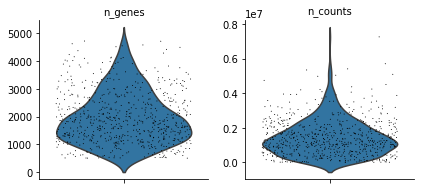

In [12]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

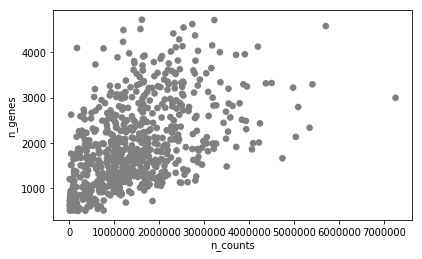

In [13]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [14]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [15]:
adata

AnnData object with n_obs × n_vars = 673 × 19455 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [16]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [17]:
sc.pp.log1p(adata)


In [18]:
adata.raw = adata

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

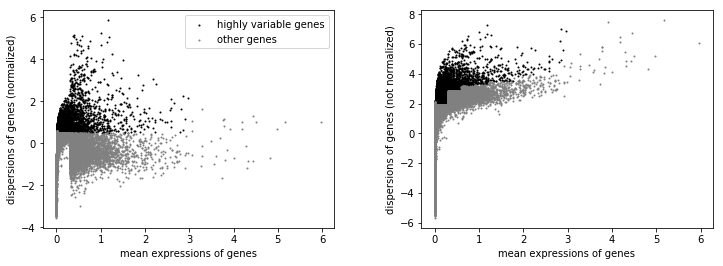

In [20]:
sc.pl.highly_variable_genes(adata)


In [21]:
adata


AnnData object with n_obs × n_vars = 673 × 19455 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [22]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [23]:
sc.tl.pca(adata, svd_solver='arpack')


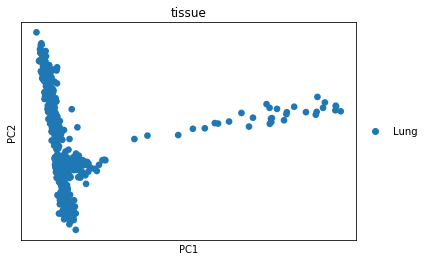

In [24]:
sc.pl.pca(adata, color='tissue')


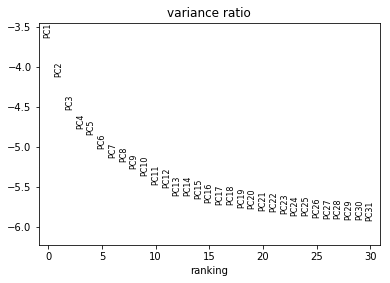

In [25]:
sc.pl.pca_variance_ratio(adata, log=True)


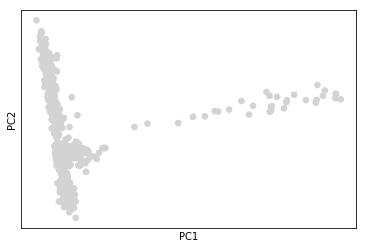

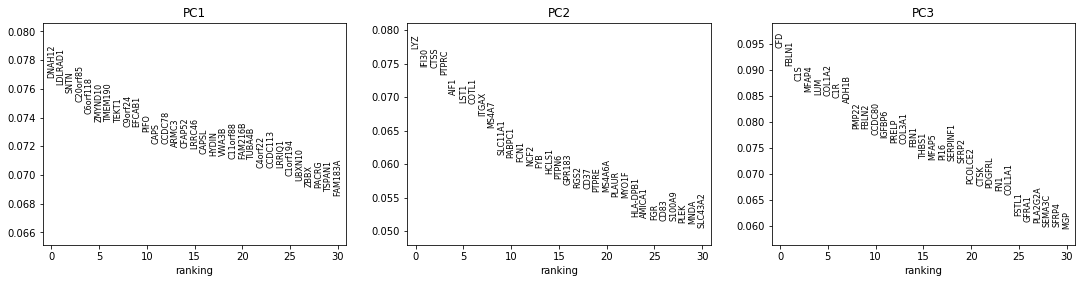

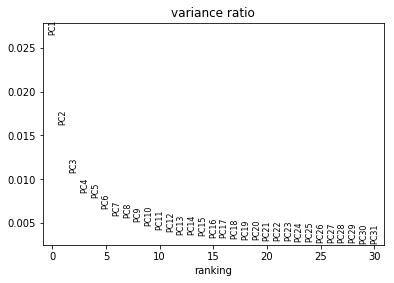

In [26]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)


In [28]:
sc.tl.louvain(adata)
sc.tl.leiden(adata)

In [29]:
sc.tl.umap(adata)


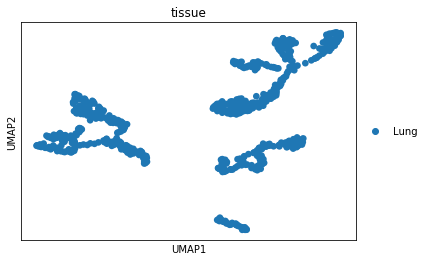

In [30]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [31]:
set(adata.obs['tissue'])

{'Lung'}

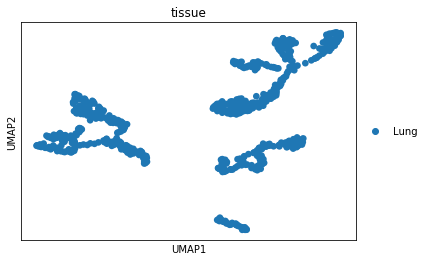

In [32]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [33]:
adata.obs.columns

Index(['plate', 'well', 'tissue', 'primary_sort', 'anatomical_position',
       'sort_order', 'well_group', 'excluded', 'sort_direction',
       'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute',
       'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun',
       'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden'],
      dtype='object')

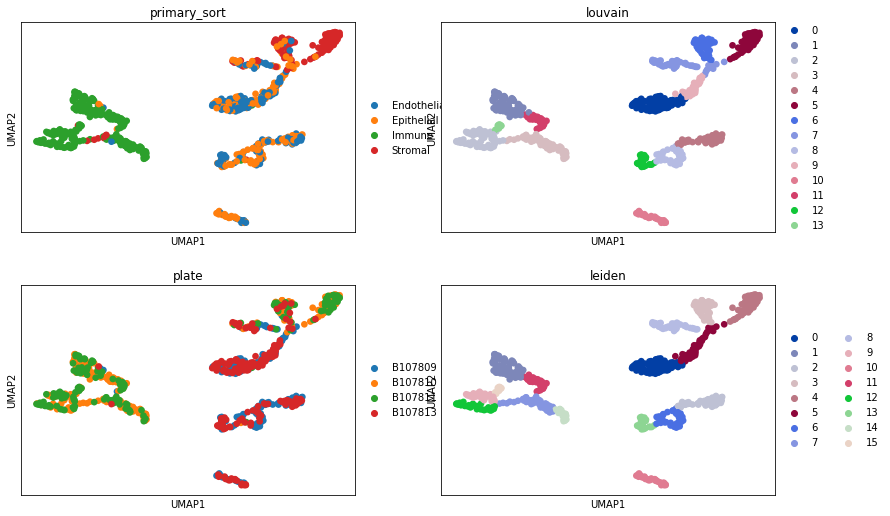

In [34]:
sc.pl.umap(adata, color=['primary_sort','louvain','plate','leiden'],ncols=2)

Looking good! Into clustering...

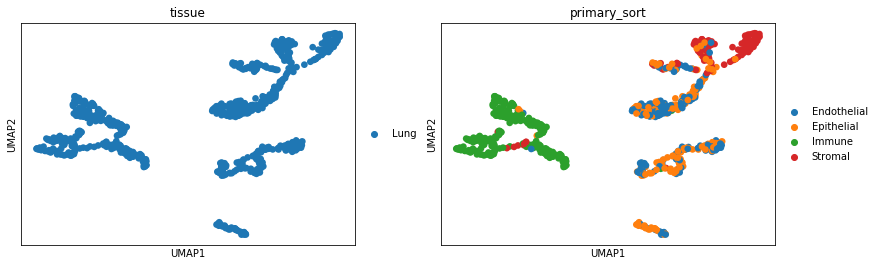

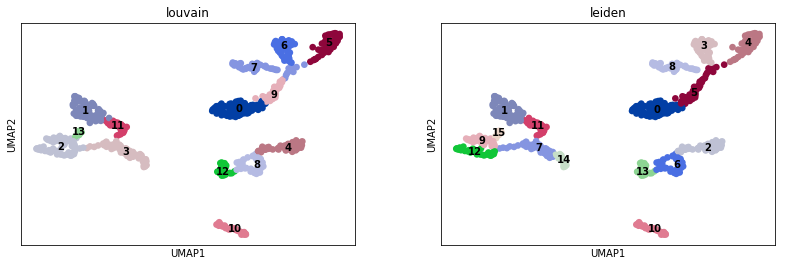

In [35]:
sc.pl.umap(adata, color=['tissue','primary_sort'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')

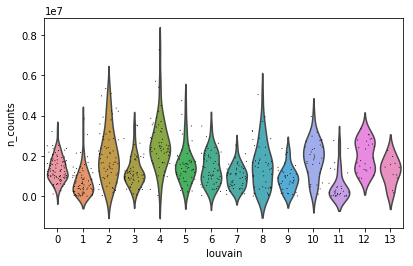

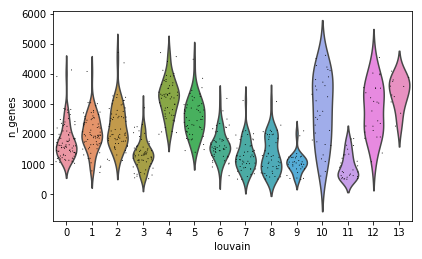

In [36]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='louvain')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='louvain')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [37]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

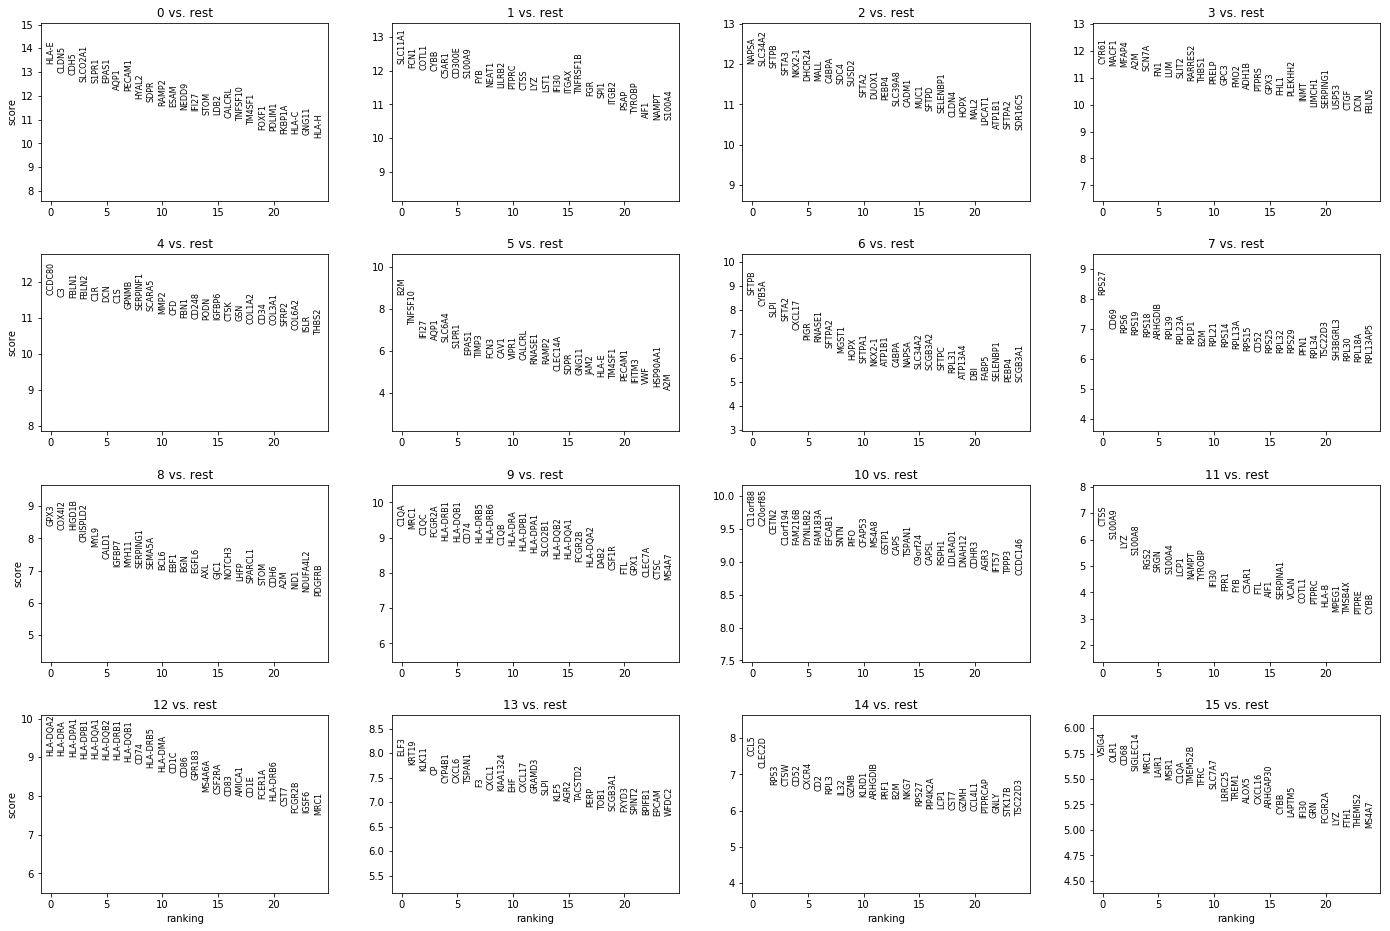

In [38]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [39]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,HLA-E,SLC11A1,NAPSA,CYR61,CCDC80,B2M,SFTPB,RPS27,GPX3,C1QA,C11orf88,CTSS,HLA-DQA2,ELF3,CCL5,VSIG4
1,CLDN5,FCN1,SLC34A2,MACF1,C3,TNFSF10,CYB5A,CD69,COX4I2,MRC1,C20orf85,S100A9,HLA-DRA,KRT19,CLEC2D,OLR1
2,CDH5,COTL1,SFTPB,MFAP4,FBLN1,IFI27,SLPI,RPS6,HIGD1B,C1QC,CETN2,LYZ,HLA-DPA1,KLK11,RPS3,CD68
3,SLCO2A1,CYBB,SFTA3,A2M,FBLN2,AQP1,SFTA2,RPS19,CRISPLD2,FCGR2A,C1orf194,S100A8,HLA-DPB1,CP,CTSW,SIGLEC14
4,S1PR1,C5AR1,NKX2-1,SCN7A,C1R,SLC6A4,CXCL17,RPS18,MYL9,HLA-DRB1,FAM216B,RGS2,HLA-DQA1,CYP4B1,CD52,MRC1
5,EPAS1,CD300E,DHCR24,FN1,DCN,S1PR1,PIGR,ARHGDIB,CALD1,HLA-DQB1,DYNLRB2,SRGN,HLA-DQB2,CXCL6,CXCR4,LAIR1
6,AQP1,S100A9,MALL,LUM,C1S,EPAS1,RNASE1,RPL39,IGFBP7,CD74,FAM183A,S100A4,HLA-DRB1,TSPAN1,CD2,MSR1
7,PECAM1,FYB,C4BPA,SLIT2,GPNMB,TIMP3,SFTPA2,RPL23A,MYH11,HLA-DRB5,EFCAB1,LCP1,HLA-DQB1,F3,RPL3,C1QA
8,HYAL2,NEAT1,SDC4,RARRES2,SERPINF1,FCN3,MGST1,RPLP1,SERPING1,HLA-DRB6,SNTN,NAMPT,CD74,CXCL1,IL32,TMEM52B
9,SDPR,LILRB2,SUSD2,THBS1,SCARA5,CAV1,HOPX,B2M,SEMA5A,C1QB,PIFO,TYROBP,HLA-DRB5,KIAA1324,GZMB,TFRC


In [40]:
muscleSC = ['PAX7','MYF5','MYOD1','NCAM1','CD82','EGFR']
# Cd56 = NCAM1
mesenchymalSC = ['PDGFRA','THY1']
# Cd90 = THY1
tcells = ['CD3E']
monocytes = ['PTPRC']
endothelial = ['PECAM1']
bcell = ['CD79B']
tenocyte = ['SCX']
schwanncell = ['SOX10']

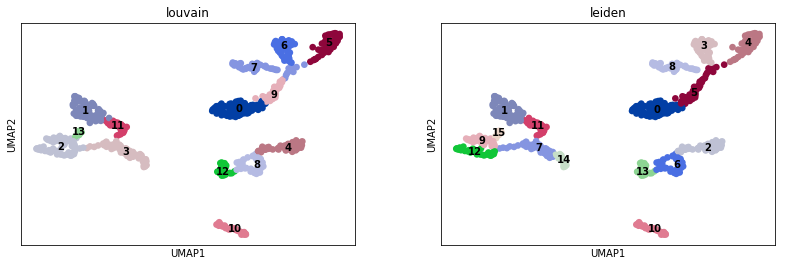

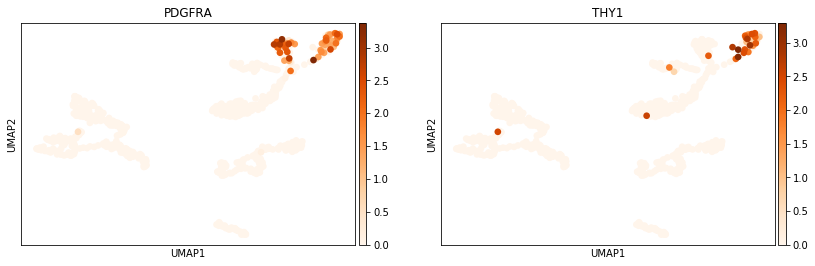

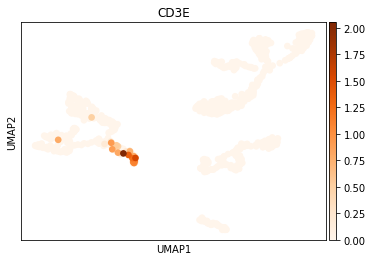

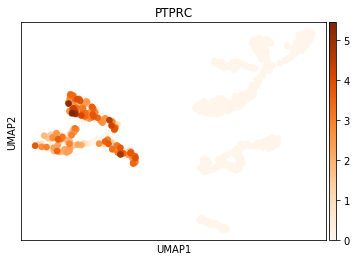

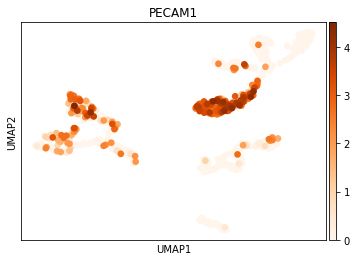

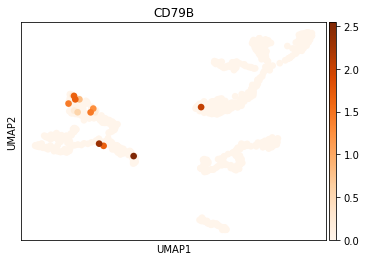

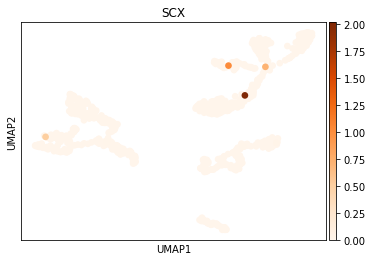

In [42]:
sc.pl.umap(adata,color=['louvain','leiden'],legend_loc='on data',cmap='Oranges')
# sc.pl.umap(adata,color=muscleSC,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=mesenchymalSC,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=tcells,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=monocytes,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=endothelial,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=bcell,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=tenocyte,legend_loc='on data',cmap='Oranges')
# sc.pl.umap(adata,color=schwanncell,legend_loc='on data',cmap='Oranges') # not found


In [86]:
muscle_leiden_cell_ontology_facs = {}
muscle_leiden_cell_ontology_facs['2'] = 'muscle stem cell'
muscle_leiden_cell_ontology_facs['0'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_facs['1'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_facs['6'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_facs['13'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_facs['10'] = 'T cells'
muscle_leiden_cell_ontology_facs['8'] = 'T cells'
muscle_leiden_cell_ontology_facs['12'] = 'T cells'
muscle_leiden_cell_ontology_facs['4'] = 'endothelial'
muscle_leiden_cell_ontology_facs['15'] = 'endothelial'
muscle_leiden_cell_ontology_facs['3'] = 'endothelial'
muscle_leiden_cell_ontology_facs['7'] = 'endothelial'
muscle_leiden_cell_ontology_facs['9'] = 'endothelial'
muscle_leiden_cell_ontology_facs['11'] = 'endothelial'
muscle_leiden_cell_ontology_facs['16'] = 'endothelial'
muscle_leiden_cell_ontology_facs['17'] = 'skeletal muscle cell'
muscle_leiden_cell_ontology_facs['5'] = 'smooth muscle cell'
muscle_leiden_cell_ontology_facs['14'] = 'smooth muscle cell'
muscle_leiden_cell_ontology_facs

{'2': 'muscle stem cell',
 '0': 'mesenchymal stem cell',
 '1': 'mesenchymal stem cell',
 '6': 'mesenchymal stem cell',
 '13': 'mesenchymal stem cell',
 '10': 'T cells',
 '8': 'T cells',
 '12': 'T cells',
 '4': 'endothelial',
 '15': 'endothelial',
 '3': 'endothelial',
 '7': 'endothelial',
 '9': 'endothelial',
 '11': 'endothelial',
 '16': 'endothelial',
 '17': 'skeletal muscle cell',
 '5': 'smooth muscle cell',
 '14': 'smooth muscle cell'}

Look at different cell types. The idea is to subcluster based on the global cell 

In [87]:
adata.obs['cell_ontology_class'] = adata.obs['leiden'].map(muscle_leiden_cell_ontology_facs)
set(adata.obs['cell_ontology_class'])

{'T cells',
 'endothelial',
 'mesenchymal stem cell',
 'muscle stem cell',
 'skeletal muscle cell',
 'smooth muscle cell'}

In [88]:
adata.write('../../data-objs/Muscle_facs_annotation_round_1.h5ad')

... storing 'cell_ontology_class' as categorical


# Annotate the DROPLET data

In [90]:
adata = tiss_droplet
adata

AnnData object with n_obs × n_vars = 6230 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [94]:
igg_genes = adata.var_names[adata.var_names.str.startswith('IGG')]
igg_genes

Index([], dtype='object', name='index')

In [97]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC')]
ercc_genes = list(set(ercc_genes)-set(['ERCC6L2', 'ERCC6L']))
ercc_genes

['ERCC3', 'ERCC5', 'ERCC6', 'ERCC2', 'ERCC8', 'ERCC4', 'ERCC1']

In [98]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 6230 × 21373 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [99]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_cells(adata, min_counts=2000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [100]:
set(adata.obs['tissue'])

{'muscle'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [101]:
#adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

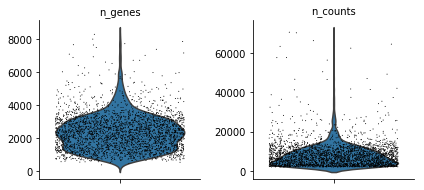

In [102]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

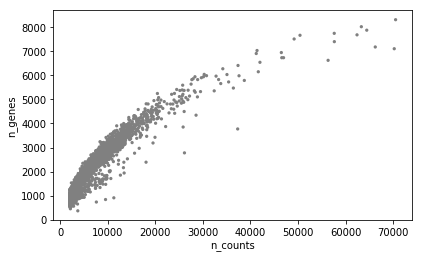

In [103]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [104]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [105]:
adata

AnnData object with n_obs × n_vars = 2818 × 17480 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [106]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [107]:
sc.pp.log1p(adata)


In [108]:
adata.raw = adata

In [109]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

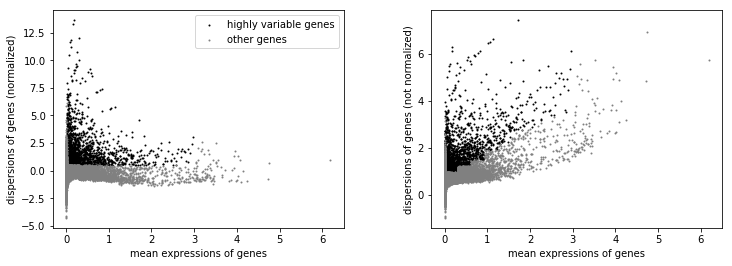

In [110]:
sc.pl.highly_variable_genes(adata)


In [111]:
adata


AnnData object with n_obs × n_vars = 2818 × 17480 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [112]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [113]:
sc.tl.pca(adata, svd_solver='arpack')


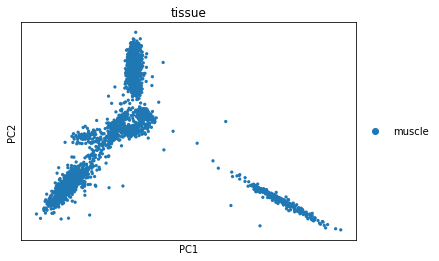

In [114]:
sc.pl.pca(adata, color='tissue')


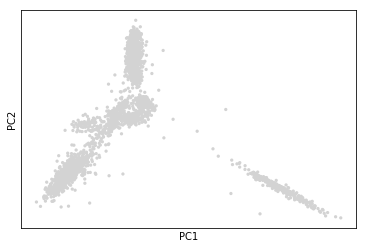

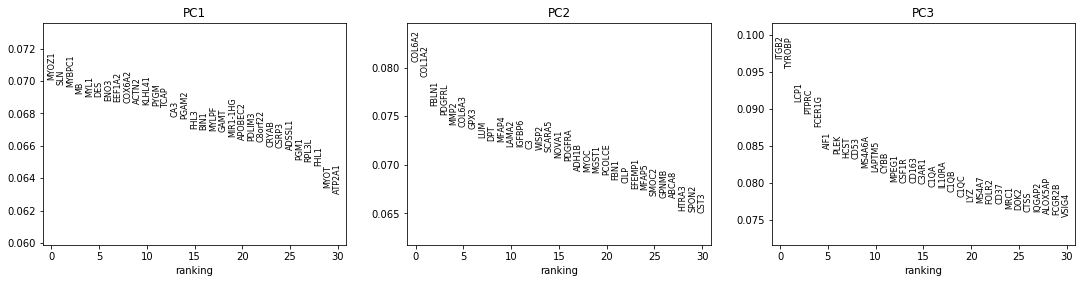

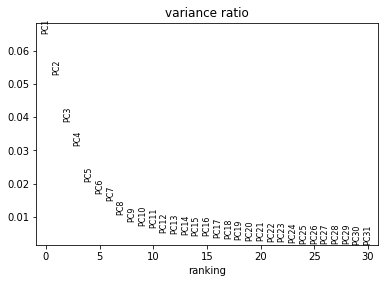

In [116]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [117]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=10)


In [118]:
sc.tl.louvain(adata)
sc.tl.leiden(adata)

In [119]:
sc.tl.umap(adata)


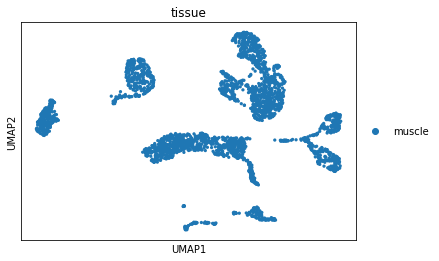

In [120]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [121]:
set(adata.obs['tissue'])

{'muscle'}

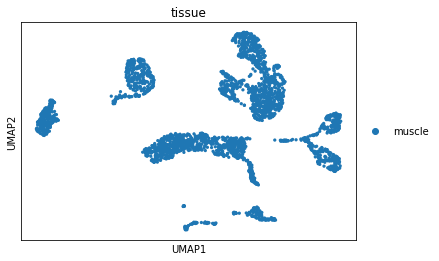

In [122]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [123]:
adata.obs.columns

Index(['10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes',
       'n_counts', 'louvain', 'leiden'],
      dtype='object')

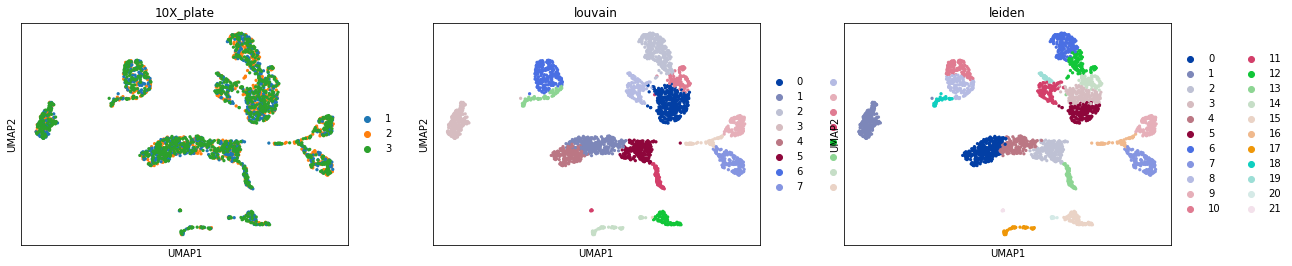

In [124]:
sc.pl.umap(adata, color=['10X_plate','louvain','leiden'])

Looking good! Into clustering...

In [270]:
adata.obs.columns

Index(['10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes',
       'n_counts', 'louvain', 'leiden'],
      dtype='object')

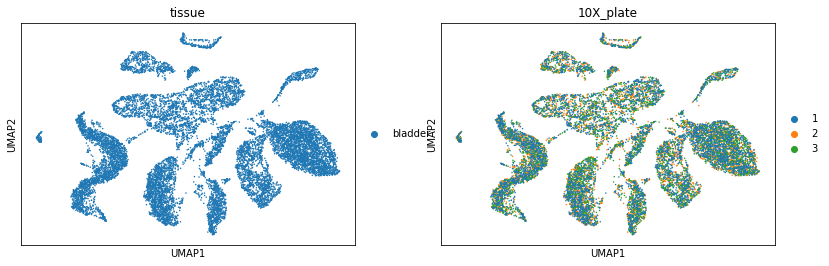

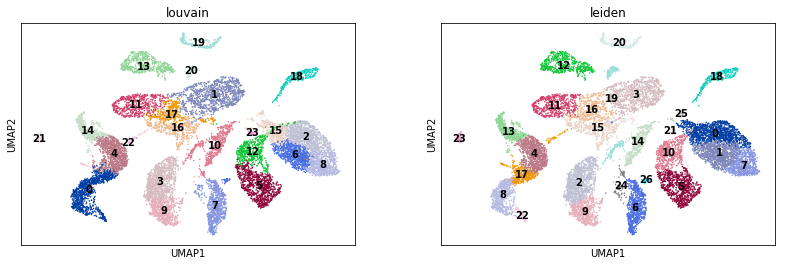

In [269]:
sc.pl.umap(adata, color=['tissue','10X_plate'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')

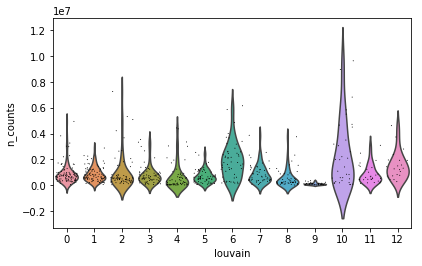

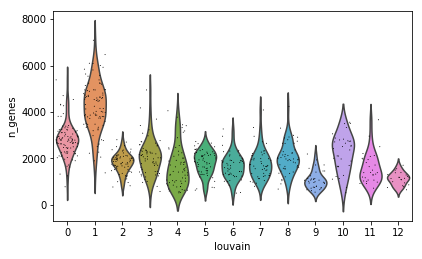

In [188]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='louvain')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='louvain')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [125]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

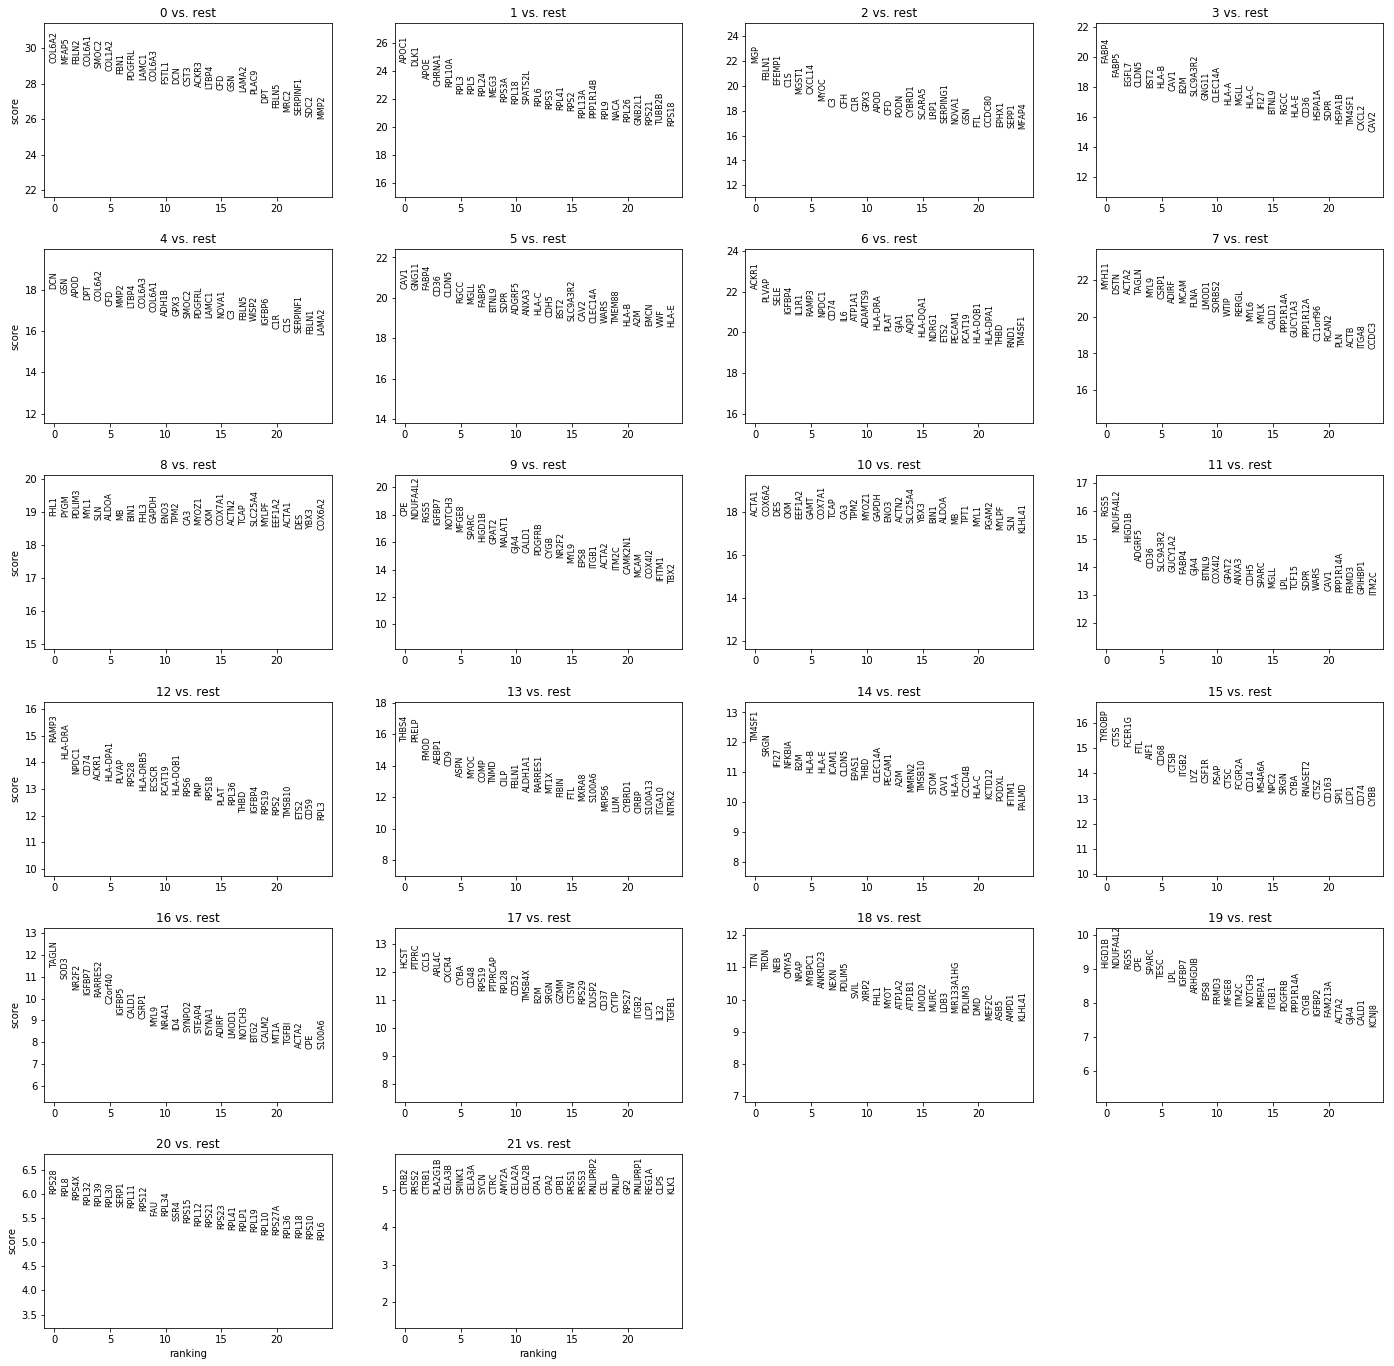

In [126]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [127]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,COL6A2,APOC1,MGP,FABP4,DCN,CAV1,ACKR1,MYH11,FHL1,CPE,...,RAMP3,THBS4,TM4SF1,TYROBP,TAGLN,HCST,TTN,HIGD1B,RPS28,CTRB2
1,MFAP5,DLK1,FBLN1,FABP5,GSN,GNG11,PLVAP,DSTN,PYGM,NDUFA4L2,...,HLA-DRA,PRELP,SRGN,CTSS,SOD3,PTPRC,TRDN,NDUFA4L2,RPL8,PRSS2
2,FBLN2,APOE,EFEMP1,EGFL7,APOD,FABP4,SELE,ACTA2,PDLIM3,RGS5,...,NPDC1,FMOD,IFI27,FCER1G,NR2F2,CCL5,NEB,RGS5,RPS4X,CTRB1
3,COL6A1,CHRNA1,C1S,CLDN5,DPT,CD36,IGFBP4,TAGLN,MYL1,IGFBP7,...,CD74,AEBP1,NFKBIA,FTL,IGFBP7,ARL4C,CMYA5,CPE,RPL32,PLA2G1B
4,SMOC2,RPL10A,MGST1,BST2,COL6A2,CLDN5,IL1R1,MYL9,SLN,NOTCH3,...,ACKR1,CD9,B2M,AIF1,RARRES2,CXCR4,NRAP,SPARC,RPL39,CELA3B
5,COL1A2,RPL3,CXCL14,HLA-B,CFD,RGCC,RAMP3,CSRP1,ALDOA,MFGE8,...,HLA-DPA1,ASPN,HLA-B,CD68,C2orf40,CYBA,MYBPC1,TESC,RPL30,SPINK1
6,FBN1,RPL5,MYOC,CAV1,MMP2,MGLL,NPDC1,ADIRF,MB,SPARC,...,PLVAP,MYOC,HLA-E,CTSB,IGFBP5,CD48,ANKRD23,LPL,SERP1,CELA3A
7,PDGFRL,RPL24,C3,B2M,LTBP4,FABP5,CD74,MCAM,BIN1,HIGD1B,...,RPS28,COMP,ICAM1,ITGB2,CALD1,RPS19,NEXN,IGFBP7,RPL11,SYCN
8,LAMC1,MEG3,CFH,SLC9A3R2,COL6A3,BTNL9,IL6,FLNA,FHL3,GPAT2,...,HLA-DRB5,TNMD,CLDN5,LYZ,CSRP1,PTPRCAP,PDLIM5,ARHGDIB,RPS12,CTRC
9,COL6A3,RPS3A,C1R,GNG11,COL6A1,SDPR,ATP1A1,LMOD1,GAPDH,MALAT1,...,ECSCR,CILP,EPAS1,CSF1R,MYL9,RPL28,SVIL,EPS8,FAU,AMY2A


In [133]:
muscleSC = ['PAX7','MYF5','MYOD1','NCAM1','CD82','EGFR']
# Cd56 = NCAM1
mesenchymalSC = ['PDGFRA','THY1']
# Cd90 = THY1
tcells = ['CD3E']
monocytes = ['PTPRC']
endothelial = ['PECAM1']
bcell = ['CD79B']
tenocyte = ['SCX']
schwanncell = ['GAP43'] #'SOX10',, 'BLBP'

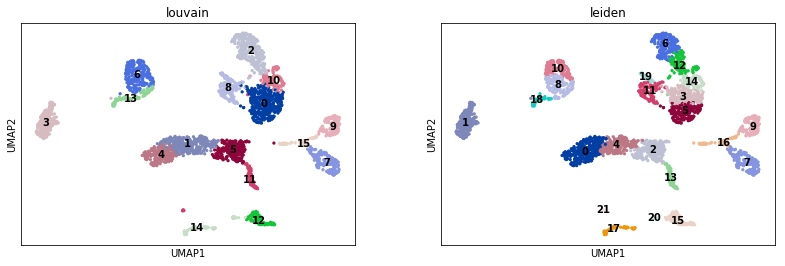

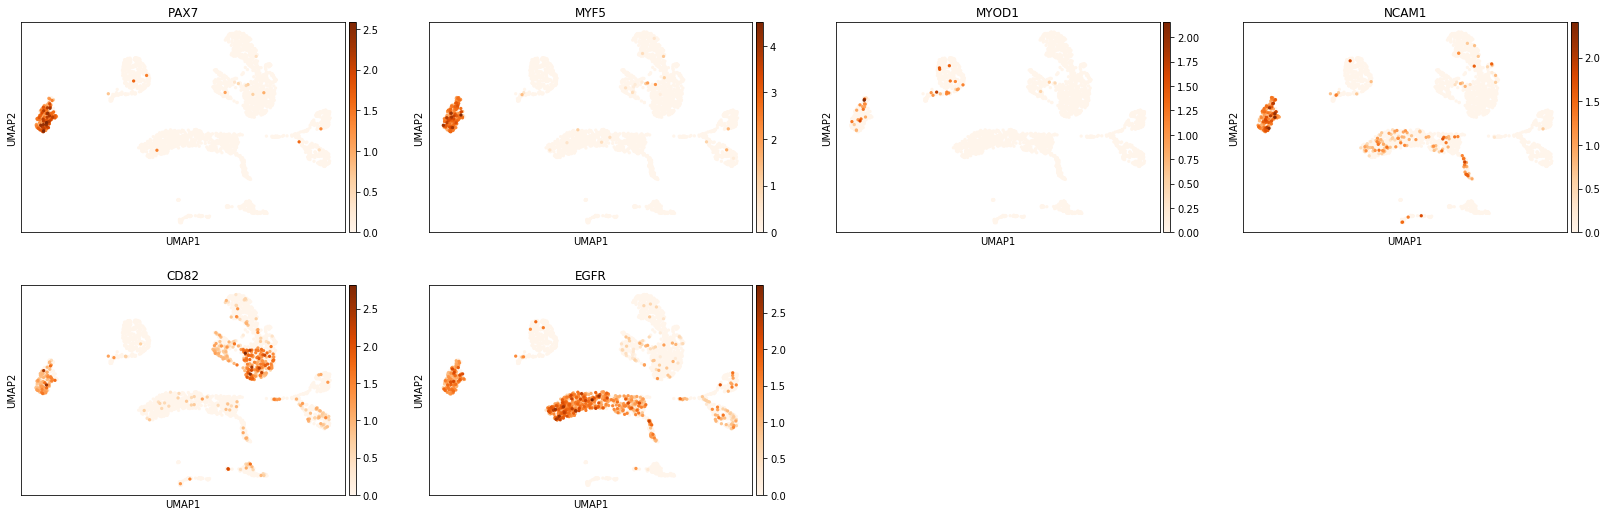

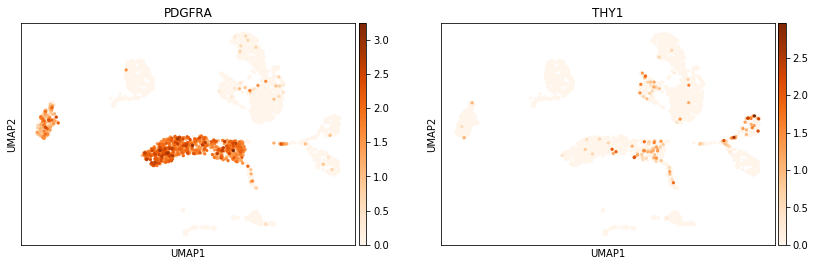

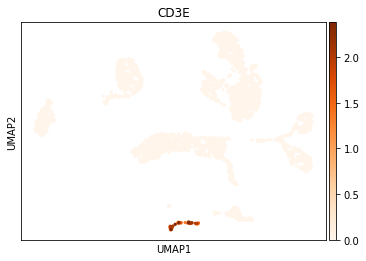

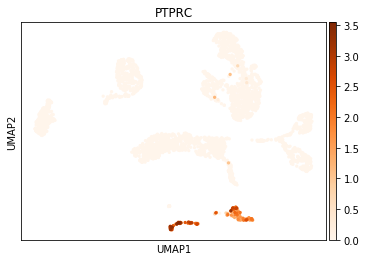

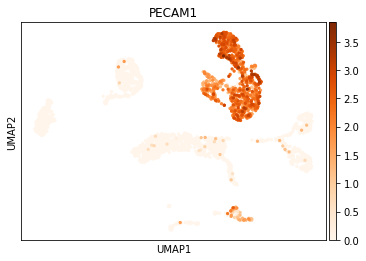

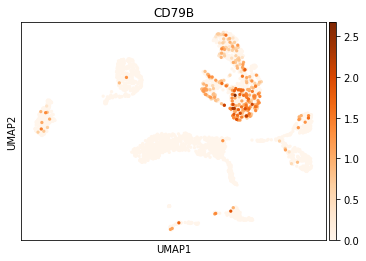

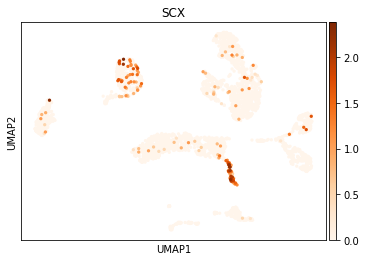

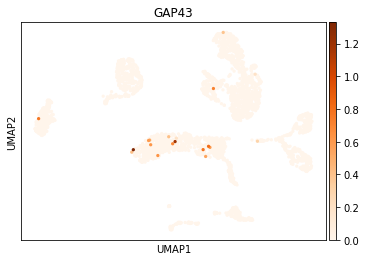

In [134]:
sc.pl.umap(adata,color=['louvain','leiden'],legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=muscleSC,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=mesenchymalSC,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=tcells,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=monocytes,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=endothelial,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=bcell,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=tenocyte,legend_loc='on data',cmap='Oranges')
sc.pl.umap(adata,color=schwanncell,legend_loc='on data',cmap='Oranges') # not found


In [135]:
muscle_leiden_cell_ontology_droplet = {}
muscle_leiden_cell_ontology_droplet['1'] = 'muscle stem cell'
muscle_leiden_cell_ontology_droplet['0'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_droplet['4'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_droplet['2'] = 'mesenchymal stem cell'
muscle_leiden_cell_ontology_droplet['17'] = 'T cells'
muscle_leiden_cell_ontology_droplet['15'] = 'monocytes'
muscle_leiden_cell_ontology_droplet['20'] = 'monocytes'
muscle_leiden_cell_ontology_droplet['21'] = 'monocytes'
muscle_leiden_cell_ontology_droplet['6'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['12'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['14'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['3'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['5'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['11'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['19'] = 'endothelial'
muscle_leiden_cell_ontology_droplet['13'] = 'tenocyte'
muscle_leiden_cell_ontology_droplet['8'] = 'skeletal muscle cell'
muscle_leiden_cell_ontology_droplet['10'] = 'skeletal muscle cell'
muscle_leiden_cell_ontology_droplet['18'] = 'skeletal muscle cell'
muscle_leiden_cell_ontology_droplet['7'] = 'smooth muscle cell'
muscle_leiden_cell_ontology_droplet['9'] = 'smooth muscle cell'
muscle_leiden_cell_ontology_droplet['16'] = 'smooth muscle cell'
muscle_leiden_cell_ontology_droplet

{'1': 'muscle stem cell',
 '0': 'mesenchymal stem cell',
 '4': 'mesenchymal stem cell',
 '2': 'mesenchymal stem cell',
 '17': 'T cells',
 '15': 'monocytes',
 '20': 'monocytes',
 '21': 'monocytes',
 '6': 'endothelial',
 '12': 'endothelial',
 '14': 'endothelial',
 '3': 'endothelial',
 '5': 'endothelial',
 '11': 'endothelial',
 '19': 'endothelial',
 '13': 'tenocyte',
 '8': 'skeletal muscle cell',
 '10': 'skeletal muscle cell',
 '18': 'skeletal muscle cell',
 '7': 'smooth muscle cell',
 '9': 'smooth muscle cell',
 '16': 'smooth muscle cell'}

Look at different cell types. The idea is to subcluster based on the global cell 

In [136]:
adata.obs['cell_ontology_class'] = adata.obs['leiden'].map(muscle_leiden_cell_ontology_droplet)
set(adata.obs['cell_ontology_class'])

{'T cells',
 'endothelial',
 'mesenchymal stem cell',
 'monocytes',
 'muscle stem cell',
 'skeletal muscle cell',
 'smooth muscle cell',
 'tenocyte'}

In [137]:
adata.obs.head()

,10X_plate,batch,tissue,method,sex,subjectid,n_genes,n_counts,louvain,leiden,cell_ontology_class
index,,,,,,,,,,,
AAACCCAAGATGTTAG-1-4,2,4,muscle,droplet,female,pilot,1972,6043.0,3,1,muscle stem cell
AAACCCAGTTTACACG-1-4,2,4,muscle,droplet,female,pilot,6542,41982.0,8,11,endothelial
AAAGGGCAGATGTAGT-1-4,2,4,muscle,droplet,female,pilot,4255,20679.0,2,6,endothelial
AAAGGTATCACATTGG-1-4,2,4,muscle,droplet,female,pilot,2353,8112.0,3,1,muscle stem cell
AAAGGTATCGGACAAG-1-4,2,4,muscle,droplet,female,pilot,2423,8252.0,3,1,muscle stem cell


In [138]:
adata.write('../../data-objs/Muscle_droplet_annotation_round_1.h5ad')

... storing 'cell_ontology_class' as categorical
